# 平滑标签
在本笔记本中，我们将演示如何通过平滑来微调标签的轮廓。这个操作与标签的腐蚀和膨胀相关。然而，它并不完全等同于开运算的效果。区别在于它不会留下空隙，而是用最近的标签填充它们。

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

一个潜在的用例是微调细胞分割结果。因此，我们来看一下基于细胞膜的细胞分割。

cl.OCLArray([[4496., 5212., 6863., ..., 2917., 2680., 2642.],
       [4533., 5146., 7555., ..., 2843., 2857., 2748.],
       [4640., 6082., 8452., ..., 3372., 3039., 3128.],
       ...,
       [1339., 1403., 1359., ..., 4458., 4314., 4795.],
       [1473., 1560., 1622., ..., 3967., 4531., 4204.],
       [1380., 1368., 1649., ..., 3091., 3558., 3682.]], dtype=float32)
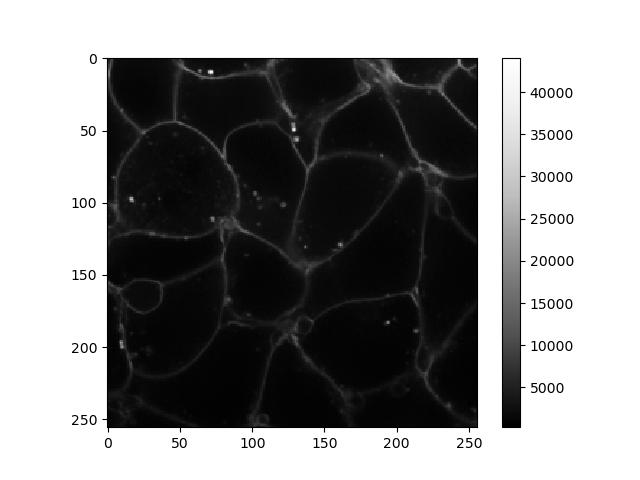
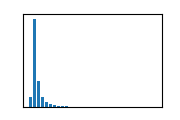

In [2]:
membranes = cle.imread("../../data/membranes.tif")
membranes


cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28]], dtype=uint32)
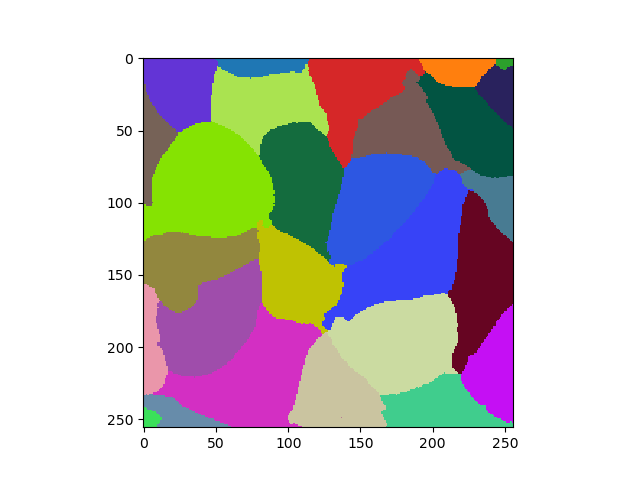

In [3]:
labels = cle.imread("../../data/membranes_labeled.tif").astype(np.uint32)
labels

`smooth_labels` 函数允许我们使标签的轮廓变得更加平滑。

cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [25, 25, 25, ..., 22, 22, 22],
       [25, 25, 25, ..., 27, 22, 22],
       [25, 25, 25, ..., 27, 27, 22]], dtype=uint32)
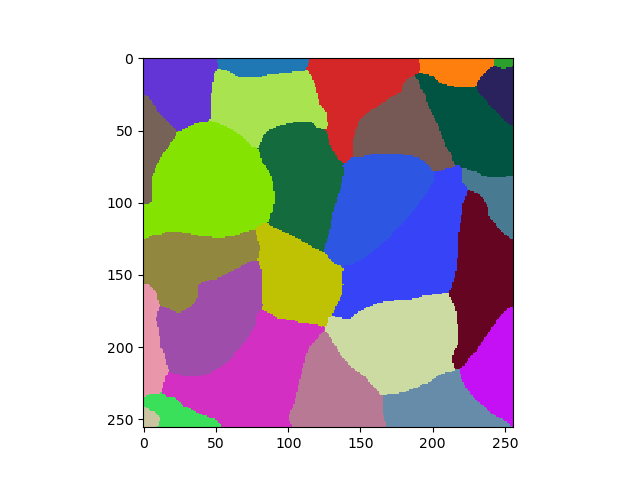

In [4]:
cle.smooth_labels(labels, radius=5)

以下代码块是用于生成[这条推文](https://twitter.com/haesleinhuepf/status/1492215964305436673)中视频的代码的修改版本，在那里我们讨论了这个滤镜的命名。

radius = 0


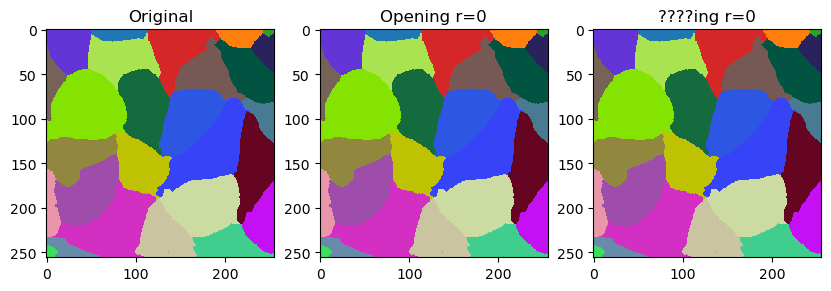

radius = 5


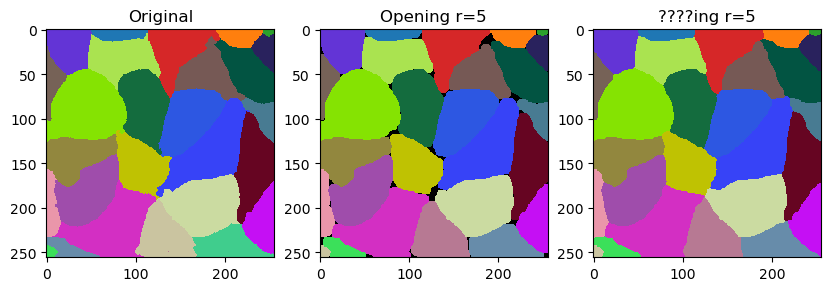

radius = 10


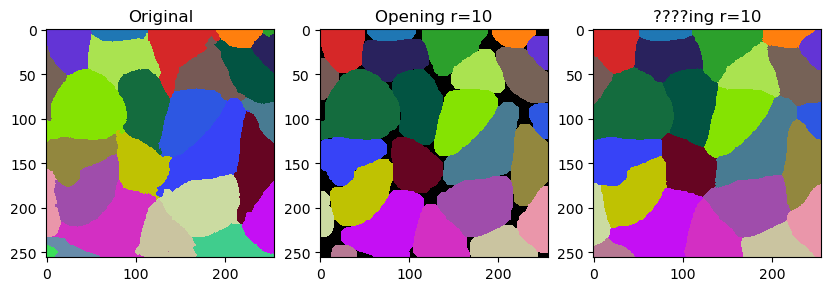

radius = 15


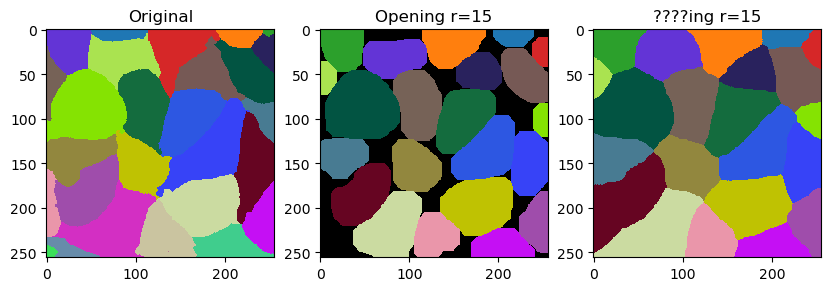

In [5]:
# for r in range(20):
for r in range(0, 20, 5):
    print("radius =", r)
    
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(labels, labels=True, plot=ax[0])
    cle.imshow(cle.opening_labels(labels, radius=r), labels=True, plot=ax[1])
    cle.imshow(cle.smooth_labels(labels, radius=r), labels=True, plot=ax[2])
    
    ax[0].set_title("原始")
    ax[1].set_title("开运算 r=" + str(r))
    ax[2].set_title("????ing r=" + str(r))
    # plt.savefig("temp/" + str(r).zfill(2) + ".tif", dpi=300)
    plt.show()